## Covid 19 prediction

In [1]:
# --------- data processing library ---------
# --------- data visualization library ------------

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics


### 1- Read Dataset

In [2]:
covid_dataset = pd.read_csv('./Covid_Dataset.csv')
covid_dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


### 2- Pre-processing the data 

In [3]:
# Converting string labels into numbers No=0 and Yes=1.
covid_dataset =  covid_dataset.apply(LabelEncoder().fit_transform)
covid_dataset

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Removing the whitespace
covid_dataset.columns = covid_dataset.columns.map(str.strip)

In [5]:
# Drop column variables that only have a single value.
covid_dataset = covid_dataset.drop('Wearing Masks', axis=1)
covid_dataset = covid_dataset.drop('Visited Public Exposed Places', axis=1)
covid_dataset = covid_dataset.drop('Family working in Public Exposed Places', axis=1)
covid_dataset = covid_dataset.drop('Sanitization from Market', axis=1)
covid_dataset = covid_dataset.drop('Asthma', axis=1)
covid_dataset = covid_dataset.drop('Hyper Tension', axis=1)
covid_dataset = covid_dataset.drop('Gastrointestinal', axis=1)
covid_dataset = covid_dataset.drop('Fatigue', axis=1)

# show remaining columns
display(covid_dataset.head())

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Abroad travel,Contact with COVID Patient,Attended Large Gathering,COVID-19
0,1,1,1,1,1,0,0,0,1,0,1,0,1
1,1,1,1,1,0,1,1,0,0,0,0,1,1
2,1,1,1,1,1,1,1,0,1,1,0,0,1
3,1,1,1,0,0,0,0,1,1,1,0,1,1
4,1,1,1,1,1,1,1,1,1,0,1,0,1


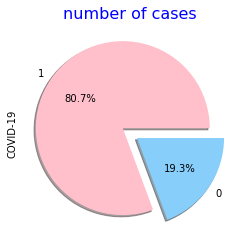

In [6]:
colors = ['pink' , 'lightskyblue']
p = covid_dataset["COVID-19"].value_counts()
p.plot.pie(explode=[0.1,0.1],colors = colors,autopct='%1.1f%%',shadow=True)
plt.title('number of cases', fontsize=16, color="blue");

Text(0.5, 1.0, 'Class Distribution')

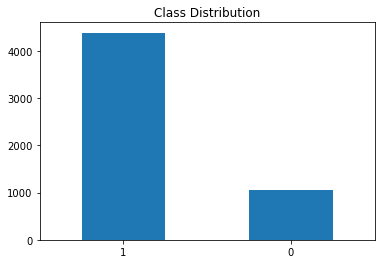

In [7]:
count_classes = pd.value_counts(covid_dataset['COVID-19'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

#### The graph shows that, there's a high variation [ Imbalanced Data ] in target column, which will give me incorrect, less accurate production.

In [8]:
print(sorted(Counter(covid_dataset['COVID-19']).items()))

[(0, 1051), (1, 4383)]


In [9]:
covid_yes = covid_dataset[covid_dataset['COVID-19']==1]
covid_No = covid_dataset[covid_dataset['COVID-19']==0]
print(covid_yes.shape  ,covid_No.shape , covid_dataset.shape)

(4383, 13) (1051, 13) (5434, 13)


#### To handle this issue by oversampling

In [10]:
# Split dataset onto X_data features data & y_data target data 
# drop the target column frome the X_data 
X_data =  covid_dataset.drop('COVID-19',axis=1)
y_data =  covid_dataset['COVID-19']
# Print the shapes of X & Y
print(X_data.shape)
print(y_data.shape)

(5434, 12)
(5434,)


In [11]:
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(random_state=0)
x_resampled , y_resampled = ROS.fit_resample(X_data,y_data)

# Our target column after oversampling
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 4383), (1, 4383)] (8766,)


Text(0.5, 1.0, 'Class Distribution')

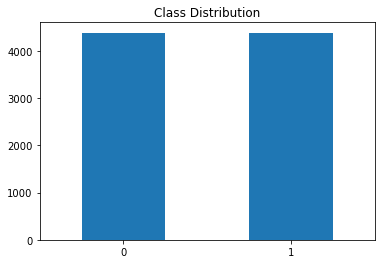

In [12]:
count_classes = pd.value_counts(y_resampled, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")


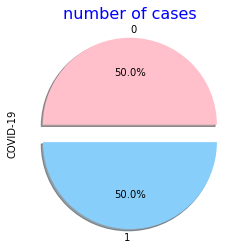

In [13]:
colors = ['pink' , 'lightskyblue']
p = y_resampled.value_counts()
p.plot.pie(explode=[0.1,0.1],colors = colors,autopct='%1.1f%%',shadow=True)
plt.title('number of cases', fontsize=16, color="blue");

In [14]:
Correlation = covid_dataset.corr()
Correlation.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Abroad travel,Contact with COVID Patient,Attended Large Gathering,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,-0.098291,-0.062172,-0.073366,0.055427,0.117795,0.214634,0.200304,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,-0.025160,-0.035416,-0.031462,0.050286,0.128726,0.164704,0.070490,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,-0.043664,-0.035912,0.047566,-0.006593,0.331418,0.128330,0.117963,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,-0.050440,-0.015971,0.002177,0.001938,0.205986,0.189251,0.216438,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.014376,0.068479,-0.056750,0.042961,0.034526,0.003776,0.061099,-0.005657
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,1.000000,-0.050480,-0.039860,0.046789,-0.088854,-0.062482,-0.020548,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,-0.050480,1.000000,0.048471,0.032390,0.043589,-0.082101,-0.162992,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,-0.039860,0.048471,1.000000,-0.032956,-0.020761,-0.025593,-0.045437,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,0.046789,0.032390,-0.032956,1.000000,0.039013,-0.085696,-0.061650,0.040627
Abroad travel,0.117795,0.128726,0.331418,0.205986,0.034526,-0.088854,0.043589,-0.020761,0.039013,1.000000,0.080210,0.113399,0.443875


In [15]:
output_df = covid_dataset['COVID-19']
feat_df = covid_dataset[['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Chronic Lung Disease', 'Headache', 'Heart Disease',
       'Diabetes', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering']]
covid_dataset = covid_dataset.apply(LabelEncoder().fit_transform)

# X_data, y_data
X_data = feat_df.values
y_data = output_df.values

# STRATIFY split into train-test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=20211114, stratify=y_data)

print('X_data={}'.format(X_data.shape))
print('X_train={}, X_test={}'.format(X_train.shape, X_test.shape))
print('y_train={}, y_test={}'.format(y_train.shape, y_test.shape))
print()
print('class % in y_train = {}'.format((np.unique(y_train, return_counts=True)[1]/y_train.shape[0]).round(2)))

X_data=(5434, 12)
X_train=(4347, 12), X_test=(1087, 12)
y_train=(4347,), y_test=(1087,)

class % in y_train = [0.19 0.81]


#### Create a table with a number of missing values in the dataset

In [16]:
missing_values = covid_dataset.isnull().sum() 
percent_missing = missing_values / covid_dataset.shape[0]*100 
value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}

In [17]:
Dataframe = pd.DataFrame(value) 
Dataframe

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0
Abroad travel,0,0.0


#### From the above table, the dataset is clean data, no missing value

### 3- Model selection section

In [18]:
# Neural_Network_Model
def nn_covid(n_features=12):
    tf.random.set_seed(20211114) 
    
    nn_covid = keras.Sequential(
        [
            layers.Dense(1024, activation="relu", name="H-1", input_shape=(12,)),
            layers.Dense(512, activation="relu", name="H-2"),
            layers.Dense(1024, activation="relu", name="H-3"),
            layers.Dense(1, activation="sigmoid", name="output"),
        ]
)
    opt = keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
    nn_covid.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return nn_covid

#### Pool of models with various parameters.

In [19]:
random_seed=20211114
ml_pool = {
    'Dt1' : DecisionTreeClassifier(max_depth=3, max_features='log2'),
    'Dt2' : DecisionTreeClassifier(max_depth=4, max_features='log2'),
    'Dt3' : DecisionTreeClassifier(max_depth=5, max_features='log2'),
    'Dt4' : DecisionTreeClassifier(max_depth=7, max_features='sqrt'),
    'Dt5' : DecisionTreeClassifier(max_depth=8, max_features='sqrt'),

    'lr1': LogisticRegression(random_state=random_seed),

    'rf1': RandomForestClassifier(n_estimators=200, max_features='log2'),

    'rf1': RandomForestClassifier(n_estimators=500, max_features='sqrt'),
    'rf2': RandomForestClassifier(n_estimators=400, max_features='sqrt'),
    'rf3': RandomForestClassifier(n_estimators=300, max_features='sqrt'),
    'rf4': RandomForestClassifier(n_estimators=200, max_features='sqrt'),
    'rf5': RandomForestClassifier(n_estimators=100, max_features='sqrt'),
    
    
    '3nn': KNeighborsClassifier(n_neighbors=3),
    '5nn': KNeighborsClassifier(n_neighbors=5),
    '7nn': KNeighborsClassifier(n_neighbors=7),
    '10nn': KNeighborsClassifier(n_neighbors=10),
    '12nn': KNeighborsClassifier(n_neighbors=12),

    'adaboost1': AdaBoostClassifier(n_estimators=500) ,
    'adaboost2': AdaBoostClassifier(n_estimators=400) ,
    'adaboost3': AdaBoostClassifier(n_estimators=300) ,
    'adaboost4': AdaBoostClassifier(n_estimators=200) ,
    'adaboost5': AdaBoostClassifier(n_estimators=100) ,
    
    'nn_covid': nn_covid,
}

#### Analyze the results of model selection by k-fold cross-validation to evaluate learning models.

In [20]:
scoring_funcs = [metrics.roc_auc_score, metrics.average_precision_score]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max',min_delta=0.001, patience=100, restore_best_weights=True)

eval_results = []
fold_num = 0
for train_folds, test_folds in skf.split(X_train, y_train):
    X_train_fold ,X_test_fold=X_train[train_folds],X_train[test_folds]
    y_train_fold ,y_test_fold=y_train[train_folds],y_train[test_folds]
    # train and evaluate models in pool
    for model in ml_pool:
        if model in ['nn_covid']:
            nn_covid = ml_pool[model]()
            nn_covid.fit(X_train_fold, y_train_fold, batch_size=1024, verbose=0, epochs=100,validation_split=0.2, callbacks=[es])
            y_pred_on_test_fold = nn_covid.predict(X_test_fold)[:,0]
        else:
            ml_pool[model].fit(X_train_fold,y_train_fold)
            y_pred_on_test_fold = ml_pool[model].predict_proba(X_test_fold)[:,1]
            
        model_eval_results = []
        for scoring_metric in scoring_funcs:
            model_eval_results.append(scoring_metric(y_test_fold, y_pred_on_test_fold))

        eval_results.append([model, fold_num] + model_eval_results) # name of model and its fold evaluation results
        print('Fold {} model {} done'.format(fold_num, model))

    print('Iteration fold {} done'.format(fold_num))
    print('----------------------------------------------------------------------------')
    fold_num += 1

Fold 0 model Dt1 done
Fold 0 model Dt2 done
Fold 0 model Dt3 done
Fold 0 model Dt4 done
Fold 0 model Dt5 done
Fold 0 model lr1 done
Fold 0 model rf1 done
Fold 0 model rf2 done
Fold 0 model rf3 done
Fold 0 model rf4 done
Fold 0 model rf5 done
Fold 0 model 3nn done
Fold 0 model 5nn done
Fold 0 model 7nn done
Fold 0 model 10nn done
Fold 0 model 12nn done
Fold 0 model adaboost1 done
Fold 0 model adaboost2 done
Fold 0 model adaboost3 done
Fold 0 model adaboost4 done
Fold 0 model adaboost5 done
Fold 0 model nn_covid done
Iteration fold 0 done
----------------------------------------------------------------------------
Fold 1 model Dt1 done
Fold 1 model Dt2 done
Fold 1 model Dt3 done
Fold 1 model Dt4 done
Fold 1 model Dt5 done
Fold 1 model lr1 done
Fold 1 model rf1 done
Fold 1 model rf2 done
Fold 1 model rf3 done
Fold 1 model rf4 done
Fold 1 model rf5 done
Fold 1 model 3nn done
Fold 1 model 5nn done
Fold 1 model 7nn done
Fold 1 model 10nn done
Fold 1 model 12nn done
Fold 1 model adaboost1 don

#### The statistical results show an average of k-performance

In [21]:
evaluation_df=pd.DataFrame(data=eval_results, columns=['Model', 'Fold Index', 'ROC-AUC', 'PR-AUC'])
evaluation_df=evaluation_df.sort_values(['Model', 'Fold Index'])
evaluation_df.groupby(['Model']).describe()[['ROC-AUC', 'PR-AUC']].round(2)

ROC-AUC                                           PR-AUC        \
            count  mean   std   min   25%   50%   75%   max  count  mean   
Model                                                                      
10nn          5.0  1.00  0.00  0.99  0.99  1.00  1.00  1.00    5.0  1.00   
12nn          5.0  1.00  0.00  0.99  1.00  1.00  1.00  1.00    5.0  1.00   
3nn           5.0  0.99  0.01  0.97  0.99  0.99  1.00  1.00    5.0  1.00   
5nn           5.0  1.00  0.00  0.99  0.99  1.00  1.00  1.00    5.0  1.00   
7nn           5.0  1.00  0.00  0.99  0.99  1.00  1.00  1.00    5.0  1.00   
Dt1           5.0  0.93  0.02  0.89  0.94  0.94  0.94  0.95    5.0  0.98   
Dt2           5.0  0.94  0.01  0.92  0.93  0.94  0.95  0.96    5.0  0.98   
Dt3           5.0  0.96  0.02  0.94  0.95  0.97  0.97  0.98    5.0  0.99   
Dt4           5.0  0.99  0.00  0.99  0.99  0.99  0.99  0.99    5.0  1.00   
Dt5           5.0  1.00  0.00  0.99  1.00  1.00  1.00  1.00    5.0  1.00   
adaboost1     5.0  0.99  0.00  0.99  0.99  0.99  0.99  0.99    5.0  1.00   
adaboost2     5.0  0.99  0.00  0.99  0.99  0.99  0.99  0.99    5.0  1.00   
adaboost3     5.0  0.99  0.00  0.99  0.99  0.99  0.99  0.99    5.0  1.00   
adaboost4     5.0  0.99  0.00  0.99  0.99  0.99  0.99  0.99    5.0  1.00   
adaboost5     5.0  0.99  0.00  0.99  0.99  0.99  0.99  0.99    5.0  1.00   
lr1           5.0  0.99  0.00  0.99  0.99  0.99  0.99  0.99    5.0  1.00   
nn_covid      5.0  1.00  0.00  1.00  1.00  1.00  1.00  1.00    5.0  1.00   
rf1           5.0  1.00  0.00  0.99  1.00  1.00  1.00  1.00    5.0  1.00   
rf2           5.0  1.00  0.00  0.99  1.00  1.00  1.00  1.00    5.0  1.00   
rf3           5.0  1.00  0.00  0.99  1.00  1.00  1.00  1.00    5.0  1.00   
rf4           5.0  1.00  0.00  0.99  1.00  1.00  1.00  1.00    5.0  1.00   
rf5           5.0  1.00  0.00  1.00  1.00  1.00  1.00  1.00    5.0  1.00   

                                               
            std   min   25%   50%   75%   max  
Model                                          
10nn       0.00  1.00  1.00  1.00  1.00  1.00  
12nn       0.00  1.00  1.00  1.00  1.00  1.00  
3nn        0.00  0.99  0.99  1.00  1.00  1.00  
5nn        0.00  1.00  1.00  1.00  1.00  1.00  
7nn        0.00  1.00  1.00  1.00  1.00  1.00  
Dt1        0.01  0.96  0.98  0.98  0.98  0.98  
Dt2        0.00  0.97  0.98  0.98  0.99  0.99  
Dt3        0.00  0.98  0.99  0.99  0.99  0.99  
Dt4        0.00  1.00  1.00  1.00  1.00  1.00  
Dt5        0.00  1.00  1.00  1.00  1.00  1.00  
adaboost1  0.00  1.00  1.00  1.00  1.00  1.00  
adaboost2  0.00  1.00  1.00  1.00  1.00  1.00  
adaboost3  0.00  1.00  1.00  1.00  1.00  1.00  
adaboost4  0.00  1.00  1.00  1.00  1.00  1.00  
adaboost5  0.00  1.00  1.00  1.00  1.00  1.00  
lr1        0.00  1.00  1.00  1.00  1.00  1.00  
nn_covid   0.00  1.00  1.00  1.00  1.00  1.00  
rf1        0.00  1.00  1.00  1.00  1.00  1.00  
rf2        0.00  1.00  1.00  1.00  1.00  1.00  
rf3        0.00  1.00  1.00  1.00  1.00  1.00  
rf4        0.00  1.00  1.00  1.00  1.00  1.00  
rf5        0.00  1.00  1.00  1.00  1.00  1.00

Text(0.5, 1.0, '5-fold CV results on ROC-AUC')

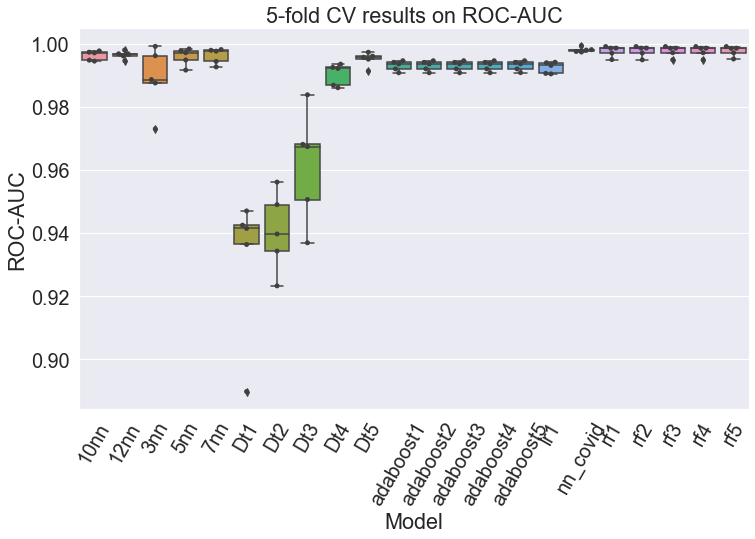

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set(font_scale=1.8)
# plot the roc_auc by model
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x="Model", y="ROC-AUC", data=evaluation_df)
ax = sns.swarmplot(x="Model", y="ROC-AUC", data=evaluation_df, color=".25")
plt.xticks(rotation=60)
plt.title('5-fold CV results on ROC-AUC')

Text(0.5, 1.0, '5-fold CV results on PR-AUC')

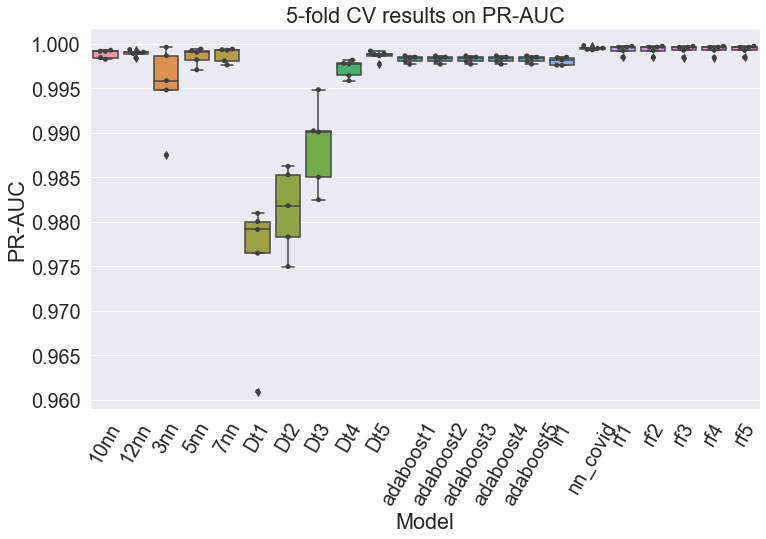

In [23]:
# plot the pr-auc by model
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x="Model", y="PR-AUC", data=evaluation_df)
ax = sns.swarmplot(x="Model", y="PR-AUC", data=evaluation_df, color=".25")
plt.xticks(rotation=60)
plt.title('5-fold CV results on PR-AUC')

#### From the PR-AUC &ROC-AUC the best model is rf5 (Random Forest Model)
> ####  - Set the best model to production the output.

In [24]:
best_model = RandomForestClassifier(random_state=random_seed)

best_model.fit(X_test,y_test)
#evaluate on test sets
y_pred_on_test = best_model.predict(X_test)
test_roc = metrics.roc_auc_score(y_test, y_pred_on_test)
test_pr = metrics.average_precision_score(y_test, y_pred_on_test)

print('Test ROC-AUC: {:2f}. Test PR-AUC: {:2f}'.format(test_roc, test_pr))

Test ROC-AUC: 0.979443. Test PR-AUC: 0.990782


In [25]:
# define one new instance
Xnew = [[1,0,1,0,1,0,1,0,1,0,1,0]] 
y_pred = best_model.predict(Xnew)
print(y_pred)

[1]


In [26]:
# define one new instance
Xnew = [[0,0,0,0,0,0,0,0,0,0,0,0]] 
y_pred = best_model.predict(Xnew)
print(y_pred)

[0]
